In this exercise, you will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that your code may need to be modified depending on your version of Keras.

In [85]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential, Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import pandas as pd
from keras import backend as K
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, classification_report
from keras_visualizer import visualizer
from IPython.display import Image

Load the MNIST data set.

In [86]:
# Loading the data from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [87]:
target_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

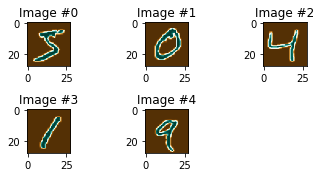

In [88]:
for i in range(5):
    plt.subplot(330 + 1 + i)
    plt.imshow(data_train[i], cmap=plt.get_cmap('BrBG'))
    plt.title('Image #' + str(i))
plt.subplots_adjust(hspace=1)
plt.show()

Build and train a Keras CNN classifier on the MNIST training set.

In [89]:
# Set that the color channel value will be last
K.set_image_data_format("channels_last")

In [90]:
# Set image data shape
channels = 1
height = 28
width = 28

# Reshape train and test data
data_train = data_train.reshape(data_train.shape[0], height, width, channels)
data_test = data_test.reshape(data_test.shape[0], height, width, channels)

# Rescaling the pixel intensity to be between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
num_classes = target_test.shape[1]

In [91]:
# Start neural network
network = Sequential(
    [
        Input(shape=(28,28,1)),
        Conv2D(64, kernel_size=(5, 5), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(classes, activation="softmax"),
    ]
)

network.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [92]:
# Compile the network
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [94]:
# Fit model to training data
network.fit(features_train, target_train, epochs=2, verbose=0, batch_size=1000, validation_data=(features_test, target_test))

Report the test accuracy of your model.

In [95]:
# Getting accuracy and loss
network.evaluate(features_test, target_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9800


[0.06119045987725258, 0.9800000190734863]

Display a confusion matrix on the test set classifications.

In [97]:
# Predicting the test values for confusion matrix
predict = network.predict(features_test, batch_size=32)

# Converting values for confusion matrix
predict = np.argmax(predict, axis=1)
test = np.argmax(target_test, axis=1)

# Print confusion matrix of model on test data
print('\nThe Confusion Matrix is below:')
print(pd.DataFrame(confusion_matrix(test, predict)))


The Confusion Matrix is below:
     0     1     2    3    4    5    6     7    8    9
0  972     1     2    0    0    0    3     1    1    0
1    0  1129     3    0    0    0    2     0    1    0
2    3     5  1010    0    3    0    0     9    2    0
3    0     0     3  987    0    7    0     9    3    1
4    1     0     1    0  975    0    3     0    0    2
5    2     0     0    2    1  882    3     1    1    0
6    5     3     0    0    3    5  941     0    1    0
7    1     5    11    1    0    0    0  1005    1    4
8    8     2     4    2    7    3    4     6  931    7
9    4     6     1    2   18    3    0     7    0  968


Summarize your results.

The accuracy of the model is around 98% on the test dataset and when it comes to the confusion matrix of the test set classifications, the majority of classifications were True Positivities. The most errors occured with the 8s and 9s.